# History & Profile Reading
The output from running MESA results in many 'profile' files being stored in the LOGS directory.  To plot profiles over time, you will need to open and read each of these.  To give you a head-start on reading these, here are some examples using astropy, or pandas file import features.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize']=(16.,9.)
mpl.rcParams['font.size']=16
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.linewidth'] = 3.0

# set x tick size and width
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.minor.width'] = 1

# set tick width
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.minor.width'] = 1

%matplotlib inline

In [2]:
import sys
import os
import numpy as np

# To use Astropy Tables to read in files
from astropy.table import QTable, Table, Column
from astropy import units as u

# To use Pandas Dataframs to read in files
import pandas as pd

## Define where our data lives

In [3]:
# Use your own 'model_dir' here. If this notebook is in your model directory (probably
# a good idea) then you can just have model_dir = '.'
model_dir = '/Users/carissaavina-beltran/Desktop/Astro_400/mesa-r15140/my_new_star_1'
data_dir = model_dir + '/LOGS'
histFile = data_dir + '/history.data' # to get a time series of global model information
pFile = data_dir + '/profile11.data' # to read a specific Profile and learn about the detailed stellar structure at one point in time

## Collect all .data files in the data directory

In [4]:
logfiles = os.listdir(data_dir)

# Get the list of just the profileNN.data files
profile_files = [data_dir + f for f in logfiles if (f.startswith('profile') & f.endswith('.data'))]

### Define where header and data are in History.data and Profile.data files

In [5]:
hist_hdr_skip = 1
hist_hdr_rows = 1
hist_data_skip = 5

prof_hdr_skip = 1
prof_hdr_rows = 1
prof_data_skip = 5

data_sep = "\\s+"

## Read in the History data file and its header

In [6]:
star_hdr = pd.read_csv(histFile,skiprows=hist_hdr_skip,sep=data_sep,nrows=hist_hdr_rows)
star = pd.read_csv(histFile,skiprows=hist_data_skip,sep=data_sep)

In [7]:
star_hdr.columns

Index(['version_number', 'compiler', 'build', 'MESA_SDK_version',
       'math_backend', 'date', 'burn_min1', 'burn_min2'],
      dtype='object')

In [8]:
star.columns

Index(['model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass',
       'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'conv_mx1_top',
       'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot',
       'mx2_top', 'mx2_bot', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lnuc', 'pp',
       'cno', 'tri_alfa', 'epsnuc_M_1', 'epsnuc_M_2', 'epsnuc_M_3',
       'epsnuc_M_4', 'epsnuc_M_5', 'epsnuc_M_6', 'epsnuc_M_7', 'epsnuc_M_8',
       'he_core_mass', 'c_core_mass', 'o_core_mass', 'si_core_mass',
       'fe_core_mass', 'neutron_rich_core_mass', 'log_Teff', 'log_L', 'log_R',
       'log_g', 'v_div_csound_surf', 'log_cntr_P', 'log_cntr_Rho',
       'log_cntr_T', 'center_mu', 'center_ye', 'center_abar', 'center_h1',
       'center_he4', 'center_c12', 'center_o16', 'surface_c12', 'surface_o16',
       'total_mass_h1', 'total_mass_he4', 'num_retries', 'num_iters'],
      dtype='object')

In [9]:
# You can directly access any of the named columns
star.star_age.values      

array([1.00000000e-05, 7.44160000e-05, 2.59586821e-04, 7.20351079e-04,
       1.86688000e-03, 4.71981083e-03, 1.18188157e-02, 2.94834115e-02,
       7.34385784e-02, 1.82813099e-01, 4.54971908e-01, 1.13219011e+00,
       2.81732572e+00, 7.01048235e+00, 1.74443978e+01, 4.34073185e+01,
       1.08011373e+02, 2.68766934e+02, 6.68778212e+02, 1.66413428e+03,
       4.14089868e+03, 1.03038811e+04, 2.56393534e+04, 6.37989160e+04,
       1.56870151e+05, 2.95759873e+05, 4.49299638e+05, 6.16628125e+05,
       7.99215633e+05, 9.98543545e+05, 1.21625508e+06, 1.45421002e+06,
       1.71445178e+06, 1.99938390e+06, 2.31178384e+06, 2.65417926e+06,
       3.02956693e+06, 3.44156998e+06, 3.89384075e+06, 4.39016886e+06,
       4.93488300e+06, 5.53277633e+06, 6.18871689e+06, 6.90748953e+06,
       7.69490962e+06, 8.55526279e+06, 9.49191358e+06, 1.05081507e+07,
       1.16042696e+07, 1.27763261e+07, 1.40175534e+07, 1.53190870e+07,
       1.66635185e+07, 1.80155610e+07, 1.93445306e+07, 2.06289205e+07,
      

## Read in the profile file and its header

In [10]:
model_hdr = pd.read_csv(pFile,skiprows=prof_hdr_skip,sep=data_sep,nrows=prof_hdr_rows)
model = pd.read_csv(pFile,skiprows=prof_data_skip,sep=data_sep)

In [11]:
model_hdr.columns

Index(['model_number', 'num_zones', 'initial_mass', 'initial_z', 'star_age',
       'time_step', 'Teff', 'photosphere_L', 'photosphere_r', 'center_eta',
       'center_h1', 'center_he3', 'center_he4', 'center_c12', 'center_n14',
       'center_o16', 'center_ne20', 'star_mass', 'star_mdot', 'star_mass_h1',
       'star_mass_he3', 'star_mass_he4', 'star_mass_c12', 'star_mass_n14',
       'star_mass_o16', 'star_mass_ne20', 'he_core_mass', 'c_core_mass',
       'o_core_mass', 'si_core_mass', 'fe_core_mass', 'neutron_rich_core_mass',
       'tau10_mass', 'tau10_radius', 'tau100_mass', 'tau100_radius',
       'dynamic_time', 'kh_timescale', 'nuc_timescale', 'power_nuc_burn',
       'power_h_burn', 'power_he_burn', 'power_neu', 'burn_min1', 'burn_min2',
       'time_seconds', 'version_number', 'compiler', 'build',
       'MESA_SDK_version', 'math_backend', 'date'],
      dtype='object')

In [12]:
model.columns

Index(['zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H',
       'y_mass_fraction_He', 'z_mass_fraction_metals'],
      dtype='object')

### 1. MESA Solar Model

a. Plot Effective Temp v. Age. Indicate on the plot the age at which our Solar model has an effective temperature of 5,777 K. 

In [13]:
star_ages = star.star_age.values /1e9
Teff_vals = 10**(star.log_Teff.values) 
# Determine age at 5777K 

print(Teff_vals)
print(star_ages[0]) # first star age
print(star_ages)

array = Teff_vals >= 5776
temps = float(Teff_vals[array][0])
ages = float(star_ages[array][0])

array

[4446.09520479 4446.13114492 4446.12956596 4446.12920359 4446.12911986
 4446.12910919 4446.12911437 4446.12910294 4446.12910018 4446.1291011
 4446.12907561 4446.12903033 4446.12889315 4446.12860085 4446.12779274
 4446.12584127 4446.1209442  4446.10881517 4446.07863872 4446.00348127
 4445.81661971 4445.35213349 4444.19946387 4441.37563783 4434.51061332
 4424.52816921 4414.50063865 4403.64492088 4392.49870526 4381.3426614
 4370.08540317 4358.88199646 4347.93700818 4337.55671947 4327.71136744
 4318.85600338 4311.19026065 4305.00108987 4300.67165205 4298.63725513
 4299.40615625 4303.49473893 4311.5757508  4324.43764692 4343.25238727
 4368.78294331 4402.38334599 4445.6106187  4499.73093416 4565.83623892
 4643.99279878 4733.88904194 4834.51147658 4941.67226931 5051.77024297
 5161.52297821 5268.55419881 5370.7650904  5467.57470533 5556.41624531
 5635.95092541 5703.64658585 5750.0223419  5767.56547702 5763.08050393
 5740.83095373 5703.0614602  5673.29598232 5678.02515214 5688.61383476
 5695.77

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

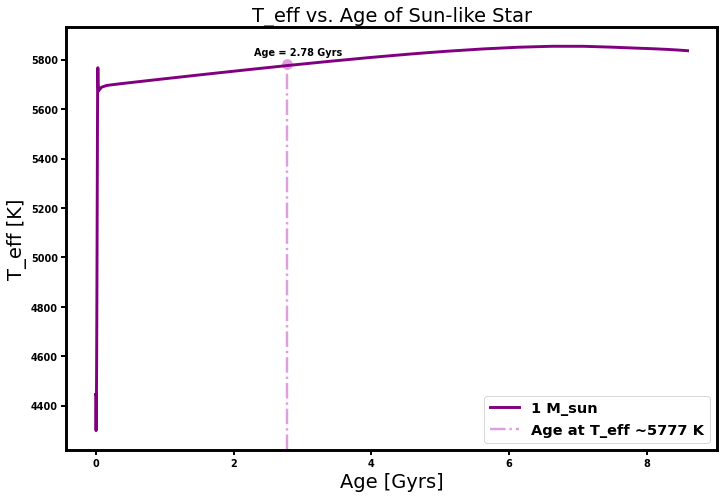

In [14]:
# plot
plt.figure(figsize=(12, 8), dpi=70)
#plt.xscale('log')

plt.plot(star_ages, Teff_vals, label = '1 M_sun', linewidth=3.0, c='purple')
plt.title('T_eff vs. Age of Sun-like Star', fontsize=20)
plt.xlabel('Age [Gyrs]', fontsize=20)
plt.ylabel('T_eff [K]', fontsize=20)

# label 
plt.axvline(2.7785980966568076, 0, 0.91, label='Age at T_eff ~5777 K', linestyle='-.', linewidth=2.5, color='plum')
plt.scatter(2.7785980966568076, 5780.56547702, s = 100, color='plum')
plt.annotate('Age = 2.78 Gyrs', (2.3, 5820)) # 0.02 to off center label

#age_of_star_at_5777 = 

plt.legend(fontsize=15, loc='best')
plt.show()

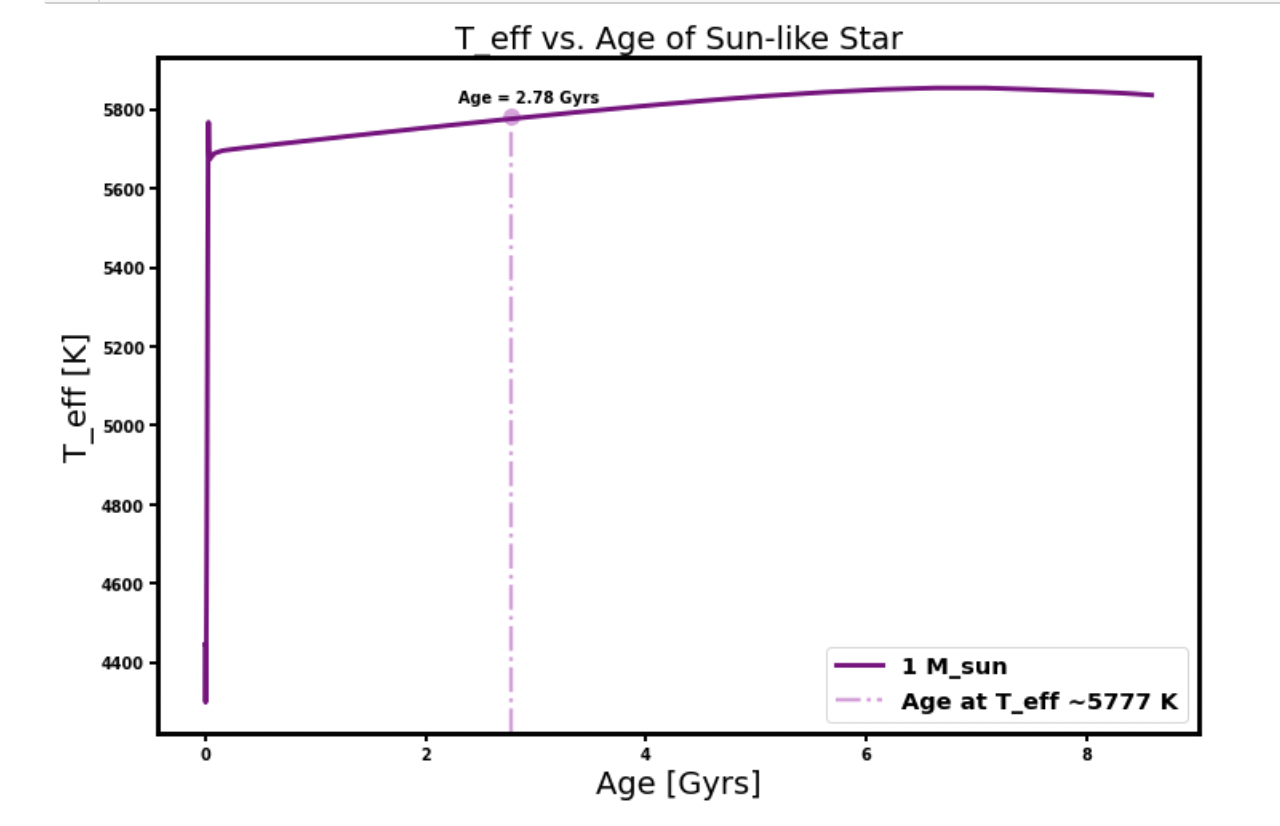

b. Make plots of Radius vs. Age & Luminosity vs. Age in units of Solar radii and Solar luminosity (ie R/R_sun and L/L_sun). Indicate on the plot the age at which our Solar model has R = 1 R_sun and L = 1 L_sun.

In [15]:
#rad_1 = 10**(star.log_R.values)
#lum_1 = 10**(star.star_age.values)
lums = star.log_L.values

radius_vals = 10**(star.log_R.values)
lum_vals = 10**(lums)

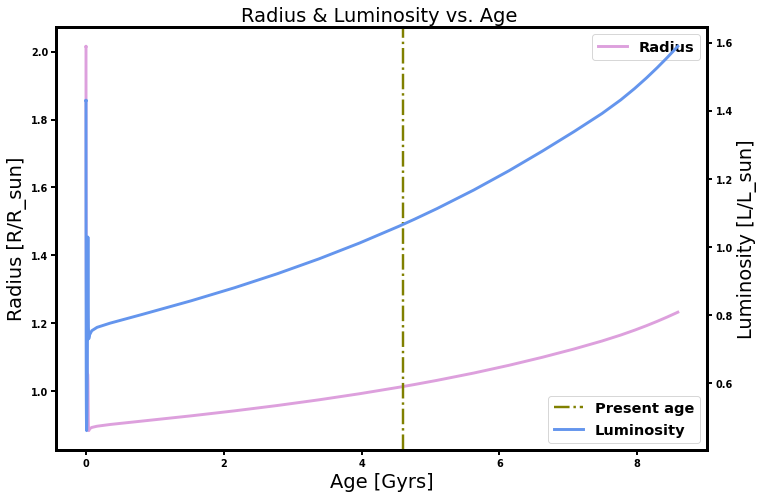

In [18]:
# plot
plt.figure(figsize=(12, 8), dpi=70)
#plt.xscale('log')
#plt.yscale('log')

plt.plot(star_ages, radius_vals, linewidth= 3.0, label='Radius', c = 'plum')
plt.legend(fontsize=15, loc='best')
plt.title('Radius & Luminosity vs. Age ', fontsize=20)
plt.xlabel('Age [Gyrs]', fontsize=20)
plt.ylabel('Radius [R/R_sun]', fontsize=20)

# create a second y scale on the other side
plt.twinx()

# plot solar model
plt.axvline(4.6, 0, 1, label='Present age', linestyle='-.', linewidth=2.5, color='olive')

# plot the second line on the second y-scale
plt.plot(star_ages,lum_vals, linewidth= 3.0, label='Luminosity', c='cornflowerblue') # small values
plt.legend(fontsize=15, loc='lower right')
plt.ylabel('Luminosity [L/L_sun]', fontsize=20) # axis label on the right
plt.show()

c. Did your model Sun match the radius, luminosity, and Tef of our Sun at its current
age? If not, why do you think that is and can we ignore it, or do we need to somehow
fix our model or our starting parameters?

In [17]:
# 4.6 Gyrs 

d. Compare your results to Figure 11.3 in the 2007 version of Carrol and Ostlie. Comment on why your model may be closer/further from the currently accepted Solar values than theirs.

### 2. Main Sequence Model

a. Attach your inlist project file (or whatever you called it) that contain the stellar mass and your stopping condition.

b. Make a plot of Luminosity vs. Teff over time for your model from ZAMS through TAMS (this is an evolutionary track), indicating the two times noted in the introduction.

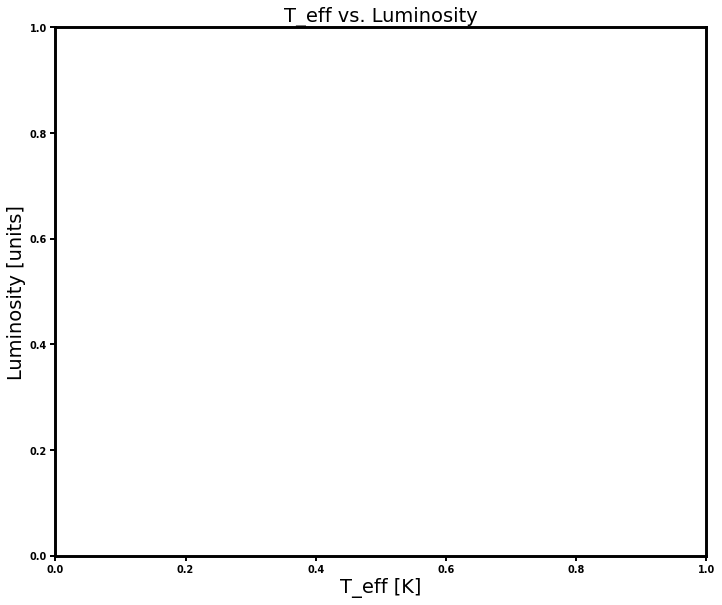

In [231]:
# read in data
# age_5 = np.loadtxt('/Users/carissaavina-beltran/Downloads/mesa-r15140/my_new_star_5/LOGS/history.data', 
#                    skiprows=6, usecols=(2))
# h_core_5 = np.loadtxt('/Users/carissaavina-beltran/Downloads/mesa-r15140/my_new_star_5/LOGS/history.data', 
#                    skiprows=6, usecols=(48))


# plot
plt.figure(figsize=(12, 10), dpi=70)
#plt.plot((age_5/(10**9)), h_core_5, c='orangered')
plt.title('T_eff vs. Luminosity', fontsize=20)
plt.xlabel('T_eff [K]', fontsize=20)
plt.ylabel('Luminosity [units]', fontsize=20)
plt.show()

c. Make a table of the following data for ZAMS, the two stopping points and TAMS,
labeled with the mass of your star.

In [230]:
# ***SET DATA TYPES***
# https://docs.astropy.org/en/stable/table/construct_table.html
# make a table

t = Table()
t['Age [Gyrs]'] = [1, 4]
t['Fraction of Hydrogen in the core'] = [2.0, 5.0]
t['Fraction of 4,2He in the core'] = ['x', 'y']
t['Temperature of the core'] = [1, 4]
t['Fraction of Hydrogen at the surface'] = [2.0, 5.0]
t['Fraction of 4,2He at the surface'] = ['x', 'y']
t['Effective Temperature'] = [2.0, 5.0]
t['Luminosity [L_sun]'] = ['x', 'y']

t
# t.add_row((4, 5.0, 'y'))

Age [Gyrs],Fraction of Hydrogen in the core,"Fraction of 4,2He in the core",Temperature of the core,Fraction of Hydrogen at the surface,"Fraction of 4,2He at the surface",Effective Temperature,Luminosity [L_sun]
int64,float64,str1,int64,float64,str1,float64,str1
1,2.0,x,1,2.0,x,2.0,x
4,5.0,y,4,5.0,y,5.0,y
